# Устойчивость интерполяционного многочлена.

Данный вопрос будет рассмотрен на примере интерполяционного многочлена Лагрнжа.

Пусть имеются значения ф-ии $f$ в $N$ различных точках $x_i$ ($i \in (0, 1, ..., N)$): $y_i = f(x_i)$, измеренные с некоторыми погрешностями $\epsilon_i \le A$

Тогда формула интерполяционного многочлена принимает следущий вид:

$$P(t) = \sum_{j = 1}^{N} (y_i + \epsilon_i) * \varphi_j(t) = \sum_{j = 1}^{N} y_i \varphi_j(t) + \sum_{j = 1}^{N} \epsilon_i \varphi_j(t)$$

Второе слагаемое является функцией ошибок в точках для интерполяционного многочлена:

$$e(t) = \sum_{j = 1}^{N} \epsilon_i \varphi_j(t)$$

Очевидно следующее утверждение относительно максимальной ошибки инетрполяции:

$$max(e(t)) = \sum_{j = 1}^{N} max(\epsilon_i) * | \varphi_j(t) |$$

Обозначим max(e(t)) = E(t) и подставим известные выражения для базисных полиномов, получаем выражение для максимальной ошибки:

$$E(t) = \sum_{j = 1}^{N} A * \left| \prod_{j = 1; j \ne k}^{N} (\frac{t - t_j}{t_k - t_j}) \right|$$

### Ошибка интерполяции для многочлена Лагранжа на Python

Реализуем функцию, которая создает функцию расчета ошибки интерполяции многочленом Лагранжа.

In [36]:
import numpy as np

def create_langrange_error(X, a):
    def lagrange_error(x):
        value = 0
        for i, xi in enumerate(X):
            prod = 1
            for j, xj in enumerate(X):
                if i != j:
                    prod *= (x - xj) / (xi - xj)
            value += a * np.abs(prod)
        return value
    return np.vectorize(lagrange_error)        

В качестве примера найдем ошибки интерполяции для линейной сетки и сетки на корнях многочлена Чебышева:

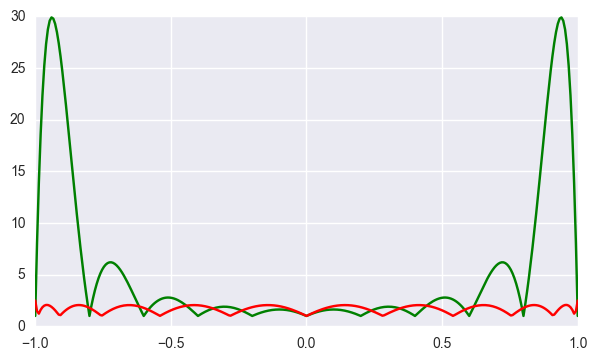

In [37]:
from math import pi

N = 11
X = np.linspace(-1, 1, 301)
x = np.linspace(-1, 1, N)
x_ch = np.cos(pi*(2*np.array(range(0,N))+1) / (2 * N))

l_errs = create_langrange_error(x, 1)
l_errs_ch = create_langrange_error(x_ch, 1)
Y = l_errs(X)
Y_ch = l_errs_ch(X)

%matplotlib inline

import seaborn
seaborn.mpl.rcParams['figure.figsize'] = (7.0, 4.0)
seaborn.mpl.rcParams['savefig.dpi'] = 100

import matplotlib
import matplotlib.pyplot as plt

lE = plt.plot(X, Y, 'g')
lEch = plt.plot(X, Y_ch, 'r')

### Ошибка интерполяции производной функции

Пусть имеются значения ф-ии $f$ в $N$ различных точках $x_i$ ($i \in (0, 1, ..., N)$): $y_i = f(x_i)$, измеренные с некоторыми погрешностями $\epsilon_i \le A$, необходимо оценить ошибку интерполяции производной этой функции.

Так как исходная функция представляется в виде линейной комбинации базисных функций, то ее производная представима в виде линейной комбинации производных базисных функций. Тогда остальные рассуждения для вычисления масимальной ошибки при интерполяции будут аналогичными предыдущим.

Выведем формулу производной для базисной функции:

$$ \varphi_j^{'}(t) = \left( \prod_{j = 1; j \ne k}^{N} (\frac{t - t_j}{t_k - t_j}) \right)^{'} = \frac{1}{\prod_{j = 1; j \ne k}^{N}(t_k - t_j)} * \left( \sum_{j = 1}^{N} \prod_{i = 1; i \ne j}^{N} (t - t_i) \right)$$

$$E(t) = \sum_{k = 1}^{N} A * \left| \frac{1}{\prod_{j = 1; j \ne k}^{N}(t_k - t_j)} * \left( \sum_{j = 1}^{N} \prod_{i = 1; i \ne j}^{N} (t - t_i) \right) \right|$$

Реализуем функцию, которая создает функцию расчета ошибки интерполяции производной многочленом Лагранжа.

In [42]:
def create_langrange_der_error(X, a):
    def lagrange_der_error(x):
        value = 0
        for k, xk in enumerate(X):
            prod_del = 1
            summ = 1
            for j, xj in enumerate(X):
                prod = 1
                for i, xi in enumerate(X):
                    if i != j:
                        prod *= (x - xi)
                summ += prod   
                if j != k:
                    prod_del *= (xk - xj)
            value += a * np.abs(summ / prod_del)
        return value
    return np.vectorize(lagrange_der_error)  

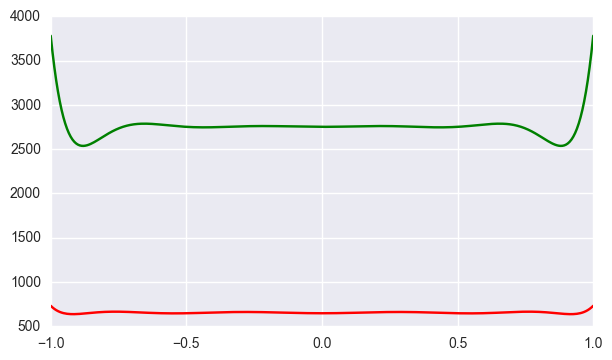

In [44]:
from math import pi

N = 11
X = np.linspace(-1, 1, 301)
x = np.linspace(-1, 1, N)
x_ch = np.cos(pi*(2*np.array(range(0,N))+1) / (2 * N))

l_errs = create_langrange_der_error(x, 1)
l_errs_ch = create_langrange_der_error(x_ch, 1)
Y = l_errs(X)
Y_ch = l_errs_ch(X)

import matplotlib
import matplotlib.pyplot as plt

lE = plt.plot(X, Y, 'g')
lEch = plt.plot(X, Y_ch, 'r')